In [23]:
# 2.1 Simple neuron example in code

import numpy
def neuron_output (x1, x2, w1, w2,b):
    """""
    A simple neuron :
    z = W1*X1 + W2*X2 + b
    Here we will NOT apply an activation yet, just return z
    """

    z = w1*x1 + w2*x2 + b
    return z

#Example inputs (eg hours studied, extra classes attended)
x1 = 5 # feature1
x2 = 2 # feature2

#Example weight and bias
w1 = 0.8
w2 = 1.2
b = -1.0

z = neuron_output(x1, x2, w1, w2, b)
print("Linear combination (z) : ", z)

Linear combination (z) :  5.4


> Exercise
Use activation function

- Pass the output through a step function
- Print a decision based on the output

Step function :
- if the input less than or equal to zero, output = 0
- otherwise output = 1

In [24]:
def activation(z):
    if z> 0:
        return 1
    return 0

y= activation(0)

def outputs(y):
    if y == 0:
        print("Nooops! We are not going anywhere")
    else:
        print("Yaaayy! Let's goooo!!!")

In [25]:
outputs(activation(neuron_output(x1, x2,w1,w2,b)))

Yaaayy! Let's goooo!!!


In [26]:

if z >= 0:
    print("Output = 0")
else :
    print("Output = 1")


Output = 0


In [27]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X=pd.DataFrame(iris.data,columns=iris.feature_names)
y = pd.Series(iris.target,name="target")

print("X shape : ",X.shape)
print("Class count :\n",y.value_counts())
X.head()


X shape :  (150, 4)
Class count :
 target
0    50
1    50
2    50
Name: count, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
#train/test split
X_train, X_test,y_train,y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print('Train Size : ',X_train.shape)
print('Test Size : ',X_test.shape)


Train Size :  (120, 4)
Test Size :  (30, 4)


In [29]:
#Scale feature (IMPORTANT for neural networks)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Optional : quick check mean/std after scaling
print('After sclaing (train): ')
print('Mean (approx) :',np.round(X_train_scaled.mean(axis=0),3))
print('Std (approx) :',np.round(X_train_scaled.std(axis=0),3))

After sclaing (train): 
Mean (approx) : [-0. -0.  0.  0.]
Std (approx) : [1. 1. 1. 1.]


In [30]:
#Train an MLPClassifier (simple setup)
mlp = MLPClassifier(
    hidden_layer_sizes=(10,), #1 hidden layer with 10 neurons
    activation="relu",
    solver="adam",
    max_iter=10,
    random_state=42
)

mlp.fit(X_train_scaled,y_train)

#Predict
y_pred = mlp.predict(X_test_scaled)

#Accurancy
acc = accuracy_score(y_test, y_pred)

print("=== MLPClassifier on iris ===")
print("Test Accurancy : ",round(acc,4))

=== MLPClassifier on iris ===
Test Accurancy :  0.1


c:\Users\WINDOWS10\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


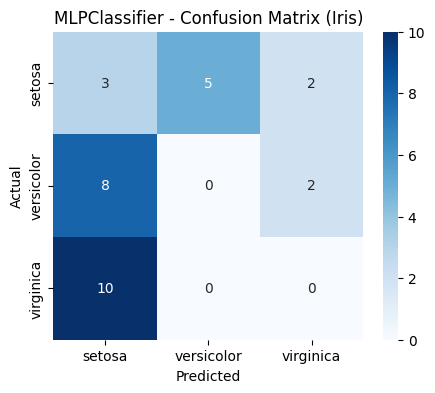

              precision    recall  f1-score   support

      setosa       0.14      0.30      0.19        10
  versicolor       0.00      0.00      0.00        10
   virginica       0.00      0.00      0.00        10

    accuracy                           0.10        30
   macro avg       0.05      0.10      0.06        30
weighted avg       0.05      0.10      0.06        30



In [31]:
#Confusion matrix + classification report
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt="d",cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("MLPClassifier - Confusion Matrix (Iris)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test,y_pred, target_names=iris.target_names))

In [32]:
from sklearn.datasets import load_breast_cancer

In [33]:
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data,columns=cancer.feature_names)
y = pd.Series(iris.target,name='target')

print("X shape : ",X.shape)
print("Class count :\n",y.value_counts())
X.head()

X shape :  (569, 30)
Class count :
 target
0    50
1    50
2    50
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
X_train, X_test,y_train,y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


ValueError: Found input variables with inconsistent numbers of samples: [569, 150]

In [37]:

mlp_bc = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation="relu",
    solver="adam",
    max_iter=10,
    random_state=42
)

mlp_bc.fit(X_train_scaled,y_train)

#Predict
y_pred = mlp_bc.predict(X_test_scaled)

#Accurancy
acc = accuracy_score(y_test, y_pred)

print("=== MLPClassifier on breast cancer ===")
print("Test Accurancy : ",round(acc,4))

=== MLPClassifier on breast cancer ===
Test Accurancy :  0.1


c:\Users\WINDOWS10\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
